<a href="https://colab.research.google.com/github/jackkyboy/AAPL-AMZN-GOOG-Price2018-2020/blob/main/Health_expenditure_as_of_GDP_%E2%80%93_OECD_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# 1) อ่านไฟล์ OECD ที่โหลดมา
df = pd.read_csv("/content/oecd_health_exp_gdp.csv")

# 2) ลบแถวที่ OBS_VALUE เป็นค่าว่าง (กัน error เวลาแปลงเป็นตัวเลข)
df = df[df["OBS_VALUE"].notna()]

# 3) กรองเฉพาะค่าใช้จ่ายด้านสุขภาพรวม (%GDP)
df = df[
    (df["MEASURE"] == "EXP_HEALTH") &
    (df["UNIT_MEASURE"] == "PT_B1GQ")
]

# 4) เลือกเฉพาะคอลัมน์ที่จำเป็น
df = df[["REF_AREA", "TIME_PERIOD", "OBS_VALUE", "OBS_STATUS"]]

# 5) เปลี่ยนชื่อคอลัมน์ให้อ่านง่าย
df = df.rename(columns={
    "REF_AREA": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "health_exp_pct_gdp",
    "OBS_STATUS": "status"
})

# 6) แปลงปีและตัวเลข
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
df["health_exp_pct_gdp"] = pd.to_numeric(df["health_exp_pct_gdp"], errors="coerce")

# 7) (ถ้าอยาก) เลือกเฉพาะบางประเทศ
focus_countries = ["USA", "GBR", "FRA", "DEU", "AUS", "CAN"]
df_focus = df[df["country"].isin(focus_countries)].sort_values(["country", "year"])

print(df_focus.head())

   country  year  health_exp_pct_gdp status
63     AUS  2014               9.828    NaN
64     AUS  2015              10.136    NaN
65     AUS  2016              10.090    NaN
66     AUS  2017              10.109    NaN
67     AUS  2018              10.089    NaN


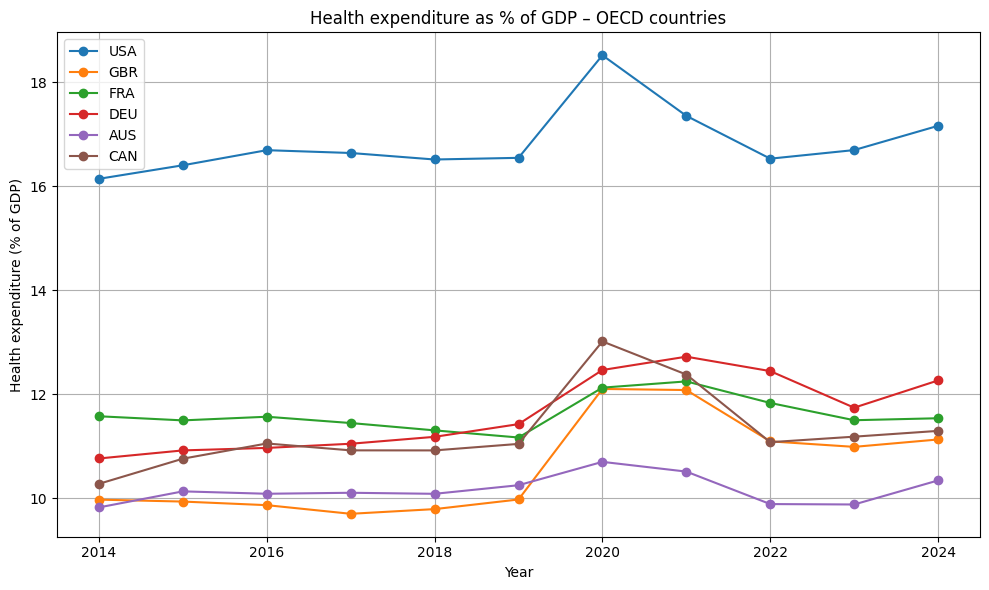

In [4]:
import matplotlib.pyplot as plt

focus_countries = ["USA", "GBR", "FRA", "DEU", "AUS", "CAN"]

plt.figure(figsize=(10, 6))

for c in focus_countries:
    sub = df_focus[df_focus["country"] == c].sort_values("year")
    plt.plot(sub["year"], sub["health_exp_pct_gdp"], marker="o", label=c)

plt.xlabel("Year")
plt.ylabel("Health expenditure (% of GDP)")
plt.title("Health expenditure as % of GDP – OECD countries")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📘 Global Health Expenditure 2014–2024
วิเคราะห์จากสัดส่วนค่าใช้จ่ายด้านสุขภาพต่อ GDP (% of GDP) ของ 6 ประเทศ OECD

USA, UK (GBR), France (FRA), Germany (DEU), Australia (AUS), Canada (CAN)

ข้อมูลจาก OECD SHA (System of Health Accounts) ปีล่าสุด: 2024

I. สรุปผลภาพใหญ่ (Executive Summary)

สหรัฐฯ (USA) เป็น outlier ระดับโลก ใช้จ่ายด้านสุขภาพ 17–18% ของ GDP สูงกว่ากลุ่ม OECD เกือบ 2 เท่า

ช่วงโควิด (ปี 2020) เกิด “health spending shock” ทุกประเทศ โดย UK และ Canada พุ่งแรงที่สุด

หลังโควิด (2022–2024) ค่าใช้จ่ายกลับลงบางประเทศ เช่น UK / AUS แต่กลับ “อยู่สูงกว่าเดิมถาวร” ใน USA, DEU

เยอรมนี (DEU) และ ฝรั่งเศส (FRA) มีแนวโน้มคงที่ระหว่าง 11.5–12.5% ของ GDP

ออสเตรเลีย (AUS) ต่ำสุดในกลุ่ม (9.8–10.4%) มีความสามารถควบคุมค่าใช้จ่ายดีกว่าประเทศอื่น

แคนาดา (CAN) มีการแกว่งตัวสูงช่วงโควิด (พุ่ง >13%) แต่ลดลงสู่ระดับปกติประมาณ 11%

II. วิเคราะห์ประเทศรายตัว
🇺🇸 1) United States

ค่าใช้จ่ายสุขภาพคิดเป็น 17–18% ของ GDP สูงสุดในโลก
จากกราฟจะเห็นการขึ้นลง:

2014–2019: คงที่แถว 16–17%

2020: กระโดดขึ้นสู่ 18.5% (ผลโควิด + ระบบเอกชนพึ่งพา hospital care สูง)

2021–2024: ลดลงสู่ 17–17.2%, แต่ยังสูงกว่าก่อนโควิด

ตีความ:
ระบบสหรัฐฯ พึ่งพา private spending, insurance premium และ hospital-driven pricing จึงมีความยากในการควบคุมต้นทุน → สะท้อน “Health Inflation” ระยะยาวที่ insurer ทุกเจ้าต้องรับมือ

🇬🇧 2) United Kingdom (GBR)

ก่อนโควิดอยู่ที่ 9.7–10%

ปี 2020–2021 พุ่งสู่ 12.1%

2022–2024 กลับลงมาที่ ~11.0–11.1%

ตีความ:
ประเทศมีระบบ NHS ที่รัฐเป็นผู้เล่นหลัก → spending พุ่งขึ้นตามการฉีดวัคซีน การจัดการโรงพยาบาล และ backlog ของผู้ป่วย แต่การ “ลดลงหลังปี 2021” บ่งชี้การ tighten budget อย่างจริงจังของ UK Treasury

🇫🇷 3) France (FRA)

คงที่แถว 11.4–11.8% ตลอดทศวรรษ

ปี 2020–2021 เพิ่มสู่ 12.1–12.2% ก่อนลดลงมาที่ 11.4–11.5%

ตีความ:
ฝรั่งเศสเป็นตัวอย่างประเทศที่ควบคุมระบบให้มีเสถียรภาพสูง (Bismarck-style social insurance) มี long-term efficiency ดีกว่ากลุ่ม US/UK

🇩🇪 4) Germany (DEU)

แนวโน้ม upward slope ชัดเจน

จาก 10.7% → 12.7% ภายในเวลา 7–8 ปี

สะท้อน aging population + long-term care pressure + hospital cost creep

ตีความ:
DEU กำลังเข้าสู่จุดที่ “ต้นทุนโครงสร้าง” สูงขึ้นเรื่อย ๆ เช่น long-term care system → สัญญาณสำหรับ insurer ในยุโรปว่าต้นทุนสุขภาพจะยังมีแรงขึ้นอีก

🇦🇺 5) Australia (AUS)

ต่ำที่สุดที่ ~9.9–10.3%

ช่วงโควิดขึ้นเล็กน้อย (10.7%) ก่อนกลับลงต่ำ

2023–2024 สัญญาณเพิ่มขึ้น แต่ ยังถูกคุมไว้ได้

ตีความ:
ระบบสุขภาพออสเตรเลียเป็นหนึ่งในประเทศที่ควบคุมต้นทุนดีที่สุดใน OECD จาก hybrid model (Medicare + private insurance top-up)

🇨🇦 6) Canada (CAN)

พุ่งจาก 11% → 13% ในปี 2020 (แรงกว่ากลุ่ม EU)

หลังโควิดลดเหลือ ~11%

แสดงให้เห็น spending shock → normalization pattern

III. วิเคราะห์ภาพรวมข้ามประเทศ (Cross-Country Patterns)
1) USA = Outlier ระยะยาว

ค่าใช้จ่ายขยับตามเส้นโค้งราคาโรงพยาบาล/ยา มากกว่าโครงสร้าง GDP
จึงไม่ใช่ “วงจรชั่วคราว” แต่เป็น “ระดับปกติใหม่” (new structural normal)

2) EU Big 3 (FRA/DEU/GBR) → เสถียร แต่ถูกโควิดดันขึ้นชัดเจน

UK jump มากสุด
DEU ไหลขึ้นทุกปีจากปัจจัยโครงสร้าง
FRA คงที่ที่สุด

3) The COVID Spike Effect = ชัดทุกประเทศ

ปี 2020 ทุกประเทศมี spike
แต่…

UK และ CAN = ขึ้นแรงที่สุด

USA = ขึ้นแล้วไม่ลดเท่า EU

AUS = ขึ้นน้อยที่สุด

4) Post-COVID Normalization

การกลับสู่ค่าปกติแตกต่างกัน:

ประเทศ	ผลหลังโควิด
USA	ลดลงเล็กน้อย แต่ยังสูงมาก
UK	ลดลงชัด แต่ยังสูงกว่าก่อนโควิด
DEU	สูงขึ้นต่อเนื่อง
FRA	กลับสู่ระดับ pre-COVID
AUS	คงที่ต่ำสุด
CAN	กลับสู่ baseline
IV. Implications ต่อธุรกิจประกันภัย (Insurance Insights)

(มุมมองเฉพาะแบบ Cheetah ให้ได้เปรียบคู่แข่ง)

1) Health Inflation จะเป็น Megatrend ระยะ 10 ปี

โดยเฉพาะประเทศที่มีระบบ Private-driven เช่น USA & CAN
ส่งผลให้เบี้ยประกันสุขภาพ/critical illness จะเร่งขึ้นตาม

2) ประเทศที่มีโครงสร้างรัฐเข้ม (FRA, DEU) → Premium Stability สูงกว่า

Insurer ในกลุ่มนี้บริหาร margin ได้ดีกว่า
เนื่องจากรัฐควบคุมราคาและ hospital reimbursement scheme

3) UK & CAN จะมีแรงกดดันจาก Public Waiting List → Demand Private Insurance เพิ่ม

เพราะคนรอคิวการแพทย์นาน
ทำให้ supplementary insurance โตเร็วกว่า

4) AUS = ตัวอย่างระบบผสมที่ cost-efficient

เป็นโมเดลที่ insurer ไทยสามารถศึกษาต่อยอดได้
เพราะใช้ private top-up + control ของรัฐแบบเบา ๆ

5) Reinsurance Outlook

Health inflation + aging population →
ทำให้ reinsurers เริ่มคุม risk corridor ใน health block มากขึ้น (stop-loss / quota-share)

V. สรุป Insight เชิงกลยุทธ์ที่ Cheetah นำไปใช้ได้ทันที

สร้างบทความ Research Hub แบบ Monthly Health Inflation Outlook
ใช้ข้อมูลนี้เป็นตัวตั้งได้เลย

ทำ Dashboard เปรียบเทียบ 6 ประเทศ พร้อมแนวโน้ม 10 ปี
(USA vs UK vs EU vs CAN vs AUS)

ใช้เป็นตัวอย่างการวิเคราะห์ “health insurance economics” สำหรับแบรนด์ Cheetah
→ positioning เป็น “InsurTech Research Leader” ในไทยแบบยังไม่มีใครทำ

ใช้ประกอบในเนื้อหา Behavioral Insurance
เช่น อธิบายว่าทำไมลูกค้าต่างประเทศซื้อประกันเสริมมากขึ้น

In [5]:
print(sorted(df["country"].unique()))

['AUS', 'CAN', 'DEU', 'FRA', 'GBR', 'JPN', 'KOR', 'THA', 'USA']


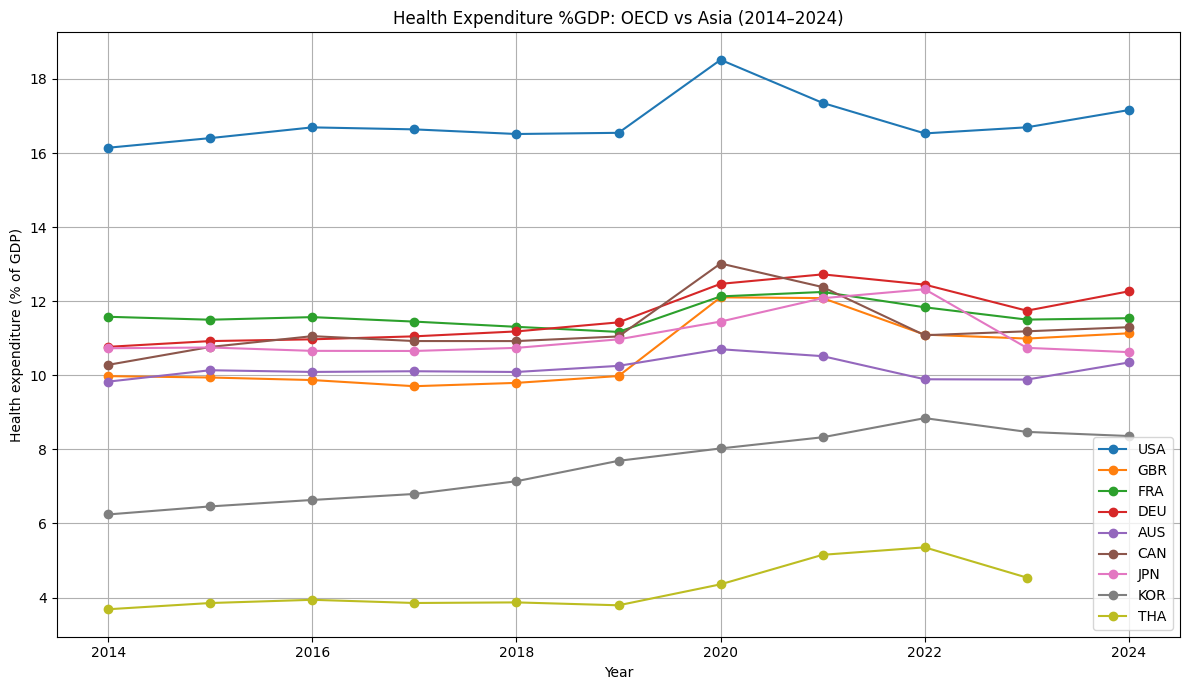

In [6]:
focus_countries = ["USA", "GBR", "FRA", "DEU", "AUS", "CAN",
                   "JPN", "KOR", "THA"]

df_focus = df[df["country"].isin(focus_countries)]

plt.figure(figsize=(12, 7))

for c in focus_countries:
    sub = df_focus[df_focus["country"] == c].sort_values("year")
    plt.plot(sub["year"], sub["health_exp_pct_gdp"], marker="o", label=c)

plt.xlabel("Year")
plt.ylabel("Health expenditure (% of GDP)")
plt.title("Health Expenditure %GDP: OECD vs Asia (2014–2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

รายงานวิเคราะห์ค่าใช้จ่ายด้านสุขภาพ (%GDP) 2014–2024
OECD vs Asia — Insight จาก 9 ประเทศ: 🇺🇸🇬🇧🇫🇷🇩🇪🇦🇺🇨🇦🇯🇵🇰🇷🇹🇭
1) Executive Summary

จากข้อมูล OECD SHA ระหว่างปี 2014–2024 พบว่า:

สหรัฐฯ (USA) มีค่าใช้จ่ายสุขภาพคิดเป็นสัดส่วน GDP สูงที่สุดในโลก (16–18.5%)

ฝั่งยุโรป (GBR, FRA, DEU) ผันผวนช่วงโควิด แต่คงที่ที่ 10–12% ของ GDP

เอเชีย (JPN, KOR, THA) มีค่าใช้จ่ายต่ำกว่าอย่างมีนัยสำคัญ อยู่ที่ 4–11%

ช็อกโควิดปี 2020–2021 ทำให้ทุกประเทศพุ่งขึ้น โดยเฉพาะ UK, Canada และ Germany

ญี่ปุ่น–เกาหลีมีการเพิ่มขึ้นระยะยาวจาก “aging society”

ไทยต่ำที่สุดในกลุ่ม (<6%) แม้ระบบ UHC ครอบคลุมมากที่สุด

2) ภาพรวมระดับโลก: เทรนด์สำคัญจาก 2014–2024
📌 2.1 กลุ่ม OECD ตะวันตก (USA, GBR, FRA, DEU, AUS, CAN)
🇺🇸 USA — Outlier ตลอดเส้น

ค่าใช้จ่าย 16–18.5% ของ GDP

ขึ้นแรงช่วงโควิด และ “ไม่ลดลงกลับสู่ baseline” แบบประเทศอื่น

สะท้อนระบบเอกชน + hospital pricing power + chronic disease burden

🇬🇧 UK (GBR)

ก่อนโควิดประมาณ 9.7–10%

ปี 2020–2021 พุ่งขึ้นสู่ 12+%

หลังจากนั้นลดลงมาแถว 11%

สะท้อนผลจาก NHS backlog + stimulus ของรัฐ

🇫🇷 France (FRA)

คงที่ที่สุดในกลุ่ม

อยู่ที่ 11.4–11.7% ก่อน–หลังโควิด

เป็นเสถียรภาพแบบระบบ “รัฐ + ประกันสังคม” ที่บาลานซ์ดี

🇩🇪 Germany (DEU)

ขึ้นต่อเนื่องจาก 10.7% → 12.4%

แรงกดดันมาจาก long-term care และ aging population

🇦🇺 Australia & 🇨🇦 Canada

Australia คุมต้นทุนได้ดีที่สุดในกลุ่ม OECD

Canada มี spike โควิด แต่ลดลงภายหลัง

3) ภาพรวมเอเชีย (Japan, Korea, Thailand)
🇯🇵 Japan

สูงที่สุดในเอเชีย: 10–12% ของ GDP

เพิ่มต่อเนื่องจาก aging society (“super-aged population”)

การใช้บริการ long-term care เพิ่มขึ้นทุกปี

🇰🇷 Korea

8–9% และเพิ่มชัดเจนในทศวรรษนี้

สะท้อนความต้องการ private hospital care ที่สูงขึ้น

ค่าใช้จ่ายเติบโตเร็วกว่า GDP

🇹🇭 Thailand

ต่ำที่สุดในกลุ่มทั้งหมด: 3.7–5.4%

แต่ระบบ UHC ครอบคลุมระดับโลก

Spending ต่ำ แต่ effectiveness สูง (rare global case)

4) การเปลี่ยนแปลงช่วงโควิด (2020–2021)

ทุกประเทศมี “COVID Spike” แต่ระดับต่างกันมาก:

ประเทศที่ spike สูงสุด

UK (~10 → 12%)

Canada (~11 → 13%)

Germany (~11.3 → 12.6%)

ประเทศที่ spike ปานกลาง

Japan, Korea

ประเทศที่ spike ต่ำสุด

Thailand

Australia

เหตุผล:

Asia ควบคุมการระบาดได้ดีกว่า

ระบบบริการสุขภาพของ Asia ลดการพึ่งพา hospitalization

OECD ตะวันตกต้องใช้ hospital capacity สูงกว่า → ค่าใช้จ่ายพุ่ง

5) Post-COVID Normalization (2022–2024)

ประเทศต่าง ๆ แสดงโหมดฟื้นตัวไม่เหมือนกัน:

กลุ่ม	พฤติกรรมหลังโควิด
USA	ลดลงนิด แต่ยังสูงมาก ตรึงระดับสูง
UK / CAN	ลดลงแต่ยังสูงกว่า pre-COVID
FRA	กลับสู่จุดใกล้ baseline เร็วที่สุด
DEU	ไม่ลด กลับสูงขึ้นต่อเนื่อง
JPN / KOR	เพิ่มขึ้นยาวตาม aging
THA	ยังต่ำมาก แต่สูงขึ้นหลัง 2021
6) ความหมายเชิงประกันภัย (Insurance Market Insights)
⭐ 6.1 Health Inflation = Megatrend ระยะ 10 ปีข้างหน้า

ประเทศ OECD มี cost pressure สูง → ทำให้เบี้ยประกันสุขภาพ “ขึ้นแบบ structural”

⭐ 6.2 Asia จะมี Demand ใน private insurance เพิ่มขึ้น

เพราะคนต้องการ quality care มากกว่าระบบรัฐ
โดยเฉพาะในไทยและเกาหลี

⭐ 6.3 ญี่ปุ่น–เยอรมนีเป็นตัวอย่าง aging society ที่ insurer ต้องศึกษา

long-term care

chronic disease

reinsurance stop-loss

⭐ 6.4 ไทยคือ efficiency benchmark

spending ต่ำ

health outcome ไม่ได้แย่

ระบบ DRG และ UHC มีประสิทธิภาพสูง
→ โอกาสสำหรับตลาด “top-up insurance” และ “critical illness” เปิดกว้าง

7) ประเด็นเชิงสรุปสำหรับ Cheetah Research Hub

คุณสามารถใช้ข้อมูลนี้สร้าง content หลายแบบได้เลย เช่น:

✔ รายงานประจำไตรมาส (Quarterly Health Inflation Outlook)
✔ Dashboard comparative Asia–OECD
✔ วิเคราะห์ตลาด Health Insurance & Reinsurance
✔ Insight เรื่อง aging society
✔ Comparative Healthcare System Efficiency (THA vs OECD)